# Research Notes
___

## Testing / Sensor locations
___
1. **B-1:** Rhythmic delta activity with admixed sharp discharges. Spectrogram suggests tail end of a seizure. Disagreement between SZ and “Other”.
2. **B-2:** Frontal lateralized sharp transients at ~1Hz with reversed polarity, likely non-cerebral source. Split between LPD and “Other” (artifact).
3. **B-3:** Diffused semi-rhythmic delta background with low amplitude generalized periodic discharges, shifting morphology, proto-GPD type pattern.
4. **B-4:** Semi-rhythmic delta activity with unstable morphology over the right hemisphere, proto-LRDA pattern.

5. **B-5:** Rhythmic delta activity with unstable morphology, poorly sustained, proto-GRDA.
6. **C-1:** 2Hz LPDs showing evolution with increasing amplitude, pattern between LPDs and seizure onset, edge-case.
7. **D-1:** Abundant GPDs on suppressed background, frequency 1-2Hz, average ~1.5Hz, suggesting a seizure, edge-case.
8. **C-2:** Split between LPDs and GPDs, higher amplitude discharges on the right.
9. **D-2:** Tied between LPDs and LRDA, rhythmic in temporal derivations, periodic in parasagittal derivations.
10. **C-3:** Split between GPDs and LRDA, sharp morphology on ascending limb of delta waves, seen on both sides.
11. **D-3:** Split between GPDs and GRDA, asymmetry in slope between ascending and descending limbs of delta wave, edge-case.
12. **C-4:** Split between LRDA and seizure, 2Hz LRDA on the left, spectrogram suggests tail end of a seizure, edge-case.
13. **D-4:** Split between LRDA and GRDA, higher amplitude rhythmic delta on the left.
14. **C-5:** Split between GRDA and seizure, evolving rhythmic delta activity with embedded epileptiform discharges, edge-case.
15. **D-5:** Split between GRDA and LPDs, generalized rhythmic delta activity, higher amplitude on right with epileptiform discharges, edge-case.
16. **Recording Regions Abbreviations:** LL = left lateral; RL = right lateral; LP = left parasagittal; RP = right parasagittal.

## Abbreviations
___
### EEG Pattern Abbreviations and Their Meanings

- **SIRPIDs**: Stimulus-Induced Rhythmic, Periodic, or Ictal Discharges
  - Common in prolonged EEG monitoring, especially in critically ill patients.
  - Associated with conditions like hypoxic injury, traumatic brain injury, hemorrhage, and toxic-metabolic disturbances.
  - Can be linked to spontaneous electrographic seizures.
  - [Source](https://pubmed.ncbi.nlm.nih.gov/29718832/)

- **SI-PDs**: Stimulus-Induced Periodic Discharges
  - Specific EEG patterns induced by stimuli.

- **SI-RDA**: Stimulus-Induced Rhythmic Delta Activity
  - Rhythmic activity in the delta frequency band induced by a stimulus.

- **SI-SW**: Likely Stimulus-Induced Sharp Waves
  - Sharp waves observed in response to a stimulus.

- **SI-bursts**: Likely Stimulus-Induced Bursts
  - Bursts of electrical activity seen in response to a stimulus.

- **SI-IIC**: Likely Stimulus-Induced Irregular Intermittent Complexes
  - Irregular, intermittent complex discharges in response to stimuli.

- **SI-BIRDS**: Likely Stimulus-Induced Brief Ictal Rhythmic Discharges
  - Brief, seizure-like rhythmic discharges triggered by a stimulus.

These EEG patterns are critical in interpreting the neurological state of patients, particularly those who are critically ill or have specific neurological conditions. They provide valuable information for treatment decisions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [22]:
df = pd.read_parquet(r'D:\__projects\DataSci\kaggle\hms-harmful-brain-activity-classification\data\train_spectrograms\353733.parquet')
#df.to_csv(r'D:\__projects\DataSci\kaggle\hms-harmful-brain-activity-classification\data\train_spectrograms\353733.csv')
df.head()
df.isnull().sum()


time        0
LL_0.59     0
LL_0.78     0
LL_0.98     0
LL_1.17     0
           ..
RP_19.14    0
RP_19.34    0
RP_19.53    0
RP_19.73    0
RP_19.92    0
Length: 401, dtype: int64

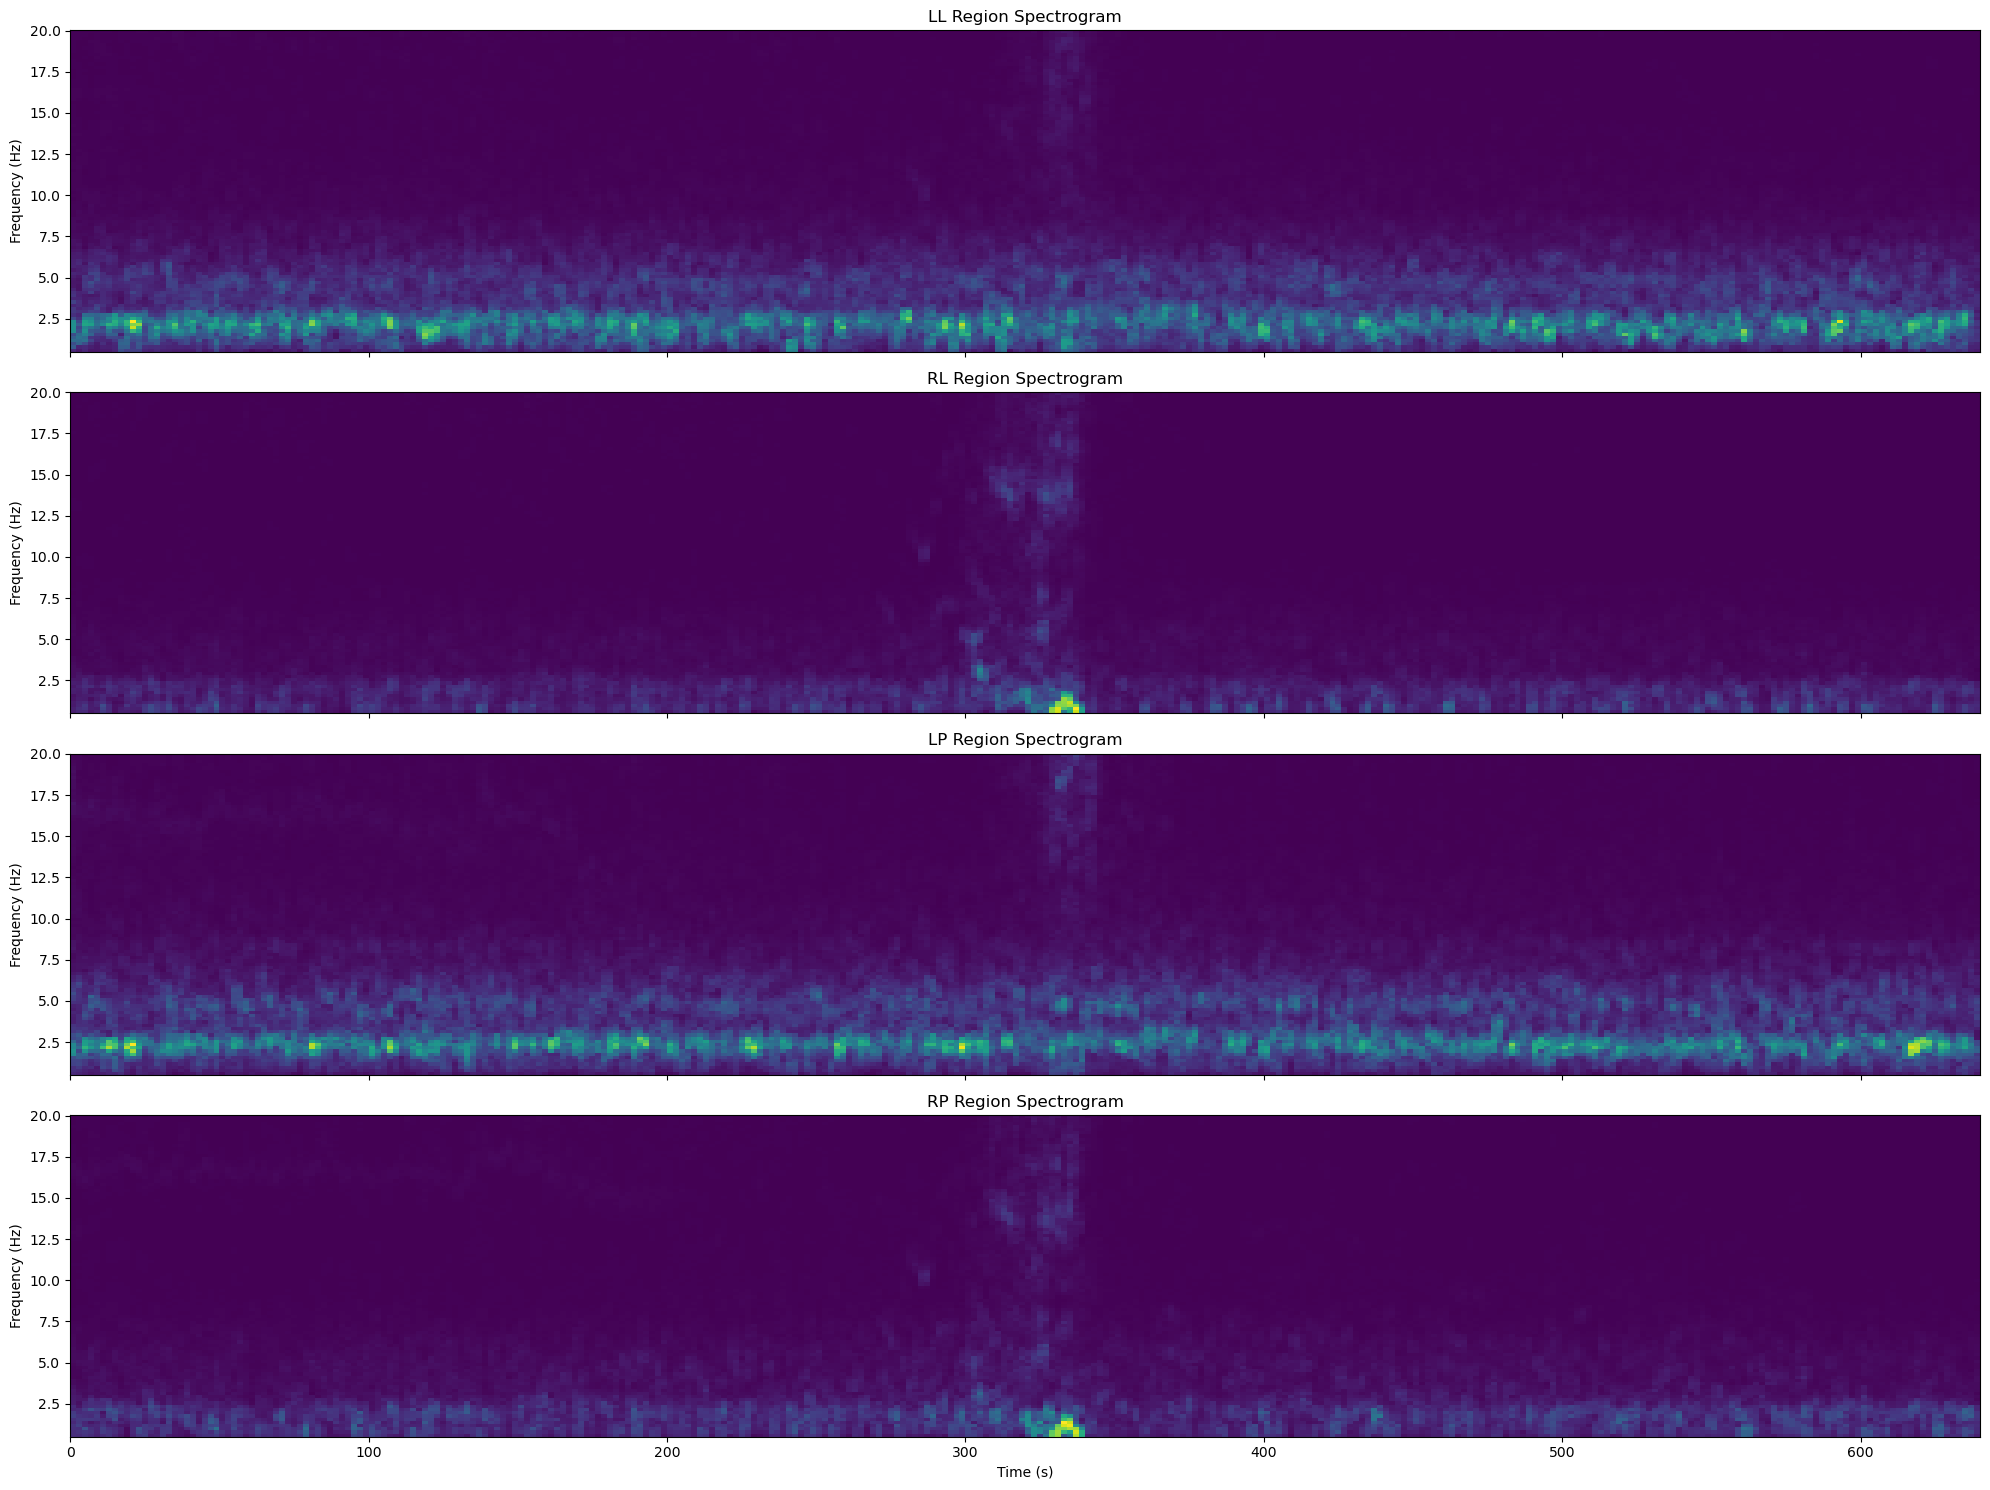

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Extract the time column for the x-axis
time = df['time']

# Assuming the frequency values can be inferred from the column names (like 'LL_1.17')
# Here we extract the frequencies from the 'LL' columns as an example
frequencies = [float(col.split('_')[1]) for col in df.columns if col.startswith('LL_')]

# Initialize a figure for the subplots
fig, axes = plt.subplots(4, 1, figsize=(20, 15), sharex=True)

# A list of region prefixes corresponding to the column names in the CSV file
regions = ['LL', 'RL', 'LP', 'RP']

# Plot a spectrogram for each region
for i, region in enumerate(regions):
    # Select the columns for the current region
    region_columns = [col for col in df.columns if col.startswith(region)]
    
    # Extract the data for the current region
    region_data = df[region_columns].values.T
    
    # Plot the spectrogram
    cax = axes[i].pcolormesh(time, frequencies, region_data, shading='auto')
    axes[i].set_title(f'{region} Region Spectrogram')
    axes[i].set_ylabel('Frequency (Hz)')

# Set common x-label
axes[-1].set_xlabel('Time (s)')

# Add a colorbar
#fig.colorbar(cax, ax=axes, orientation='vertical', label='Power')

# Adjust the layout to make sure everything fits
fig.tight_layout()

# Display the plot
plt.show()



In [ ]:
display(df.head())
display(df.shape)

In [ ]:
import mne

# Load the Parquet file into a pandas DataFrame
eeg_parquet_path = r'..\data\train_eegs\568657.parquet'  # Replace with your file path
eeg_df = pd.read_parquet(eeg_parquet_path)

# Assuming the EEG data starts from the first column onwards and excludes any non-EEG columns
eeg_data = eeg_df.iloc[:21].to_numpy()

# Channel names 
ch_names = eeg_df.columns[:21].to_list()
print(ch_names)
sfreq = 256  # Sampling frequency

# Create MNE Info object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq)

# Transpose the data to match MNE's expected format (n_channels, n_samples)
#eeg_data_transposed = np.transpose(eeg_data)

# Create an MNE RawArray object
raw = mne.io.RawArray(np.transpose(eeg_data), info)

In [27]:
import mne
df = pd.read_parquet(r'..\data\train_eegs\568657.parquet')
csv = np.genfromtxt(r'..\data\train_eegs\568657.csv', delimiter=",",usecols=range(1, 21)) # I had to use a range here because I think it was using the index as a column
ch_names = df.columns.tolist()
print(ch_names)
sfreq = 200 # not sure about the freq if you guys know the freq let me know, I will look into it more.
info = mne.create_info(ch_names=ch_names, sfreq=sfreq)
print(info)
raw = mne.io.RawArray(np.transpose(csv), info)

['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, F7, T3, T5, O1, Fz, Cz, Pz, Fp2, F4, C4, P4, ...
 chs: 20 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 200.0 Hz
>
Creating RawArray with float64 data, n_channels=20, n_times=13201
    Range : 0 ... 13200 =      0.000 ...    66.000 secs
Ready.


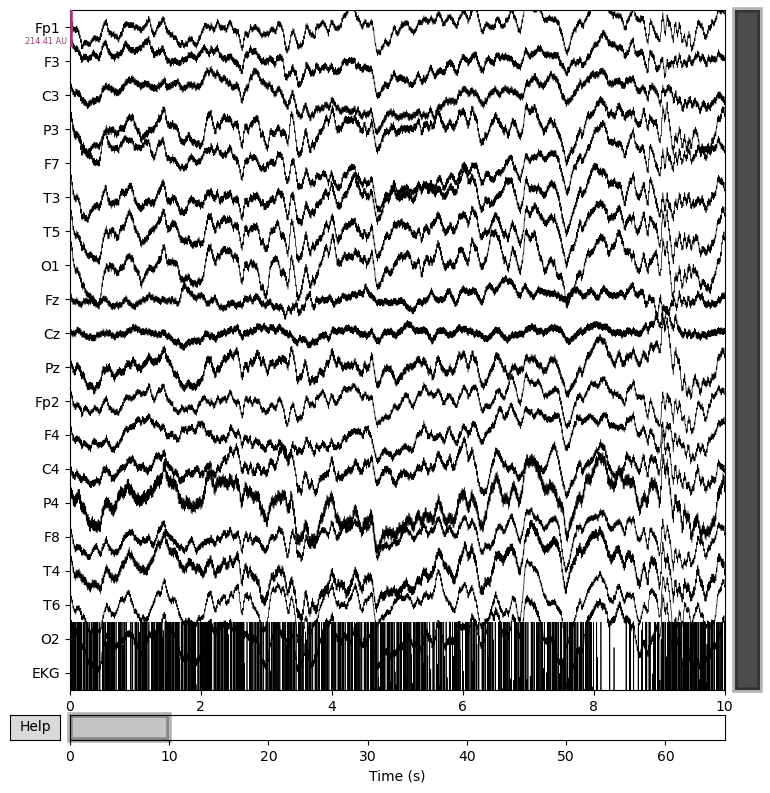

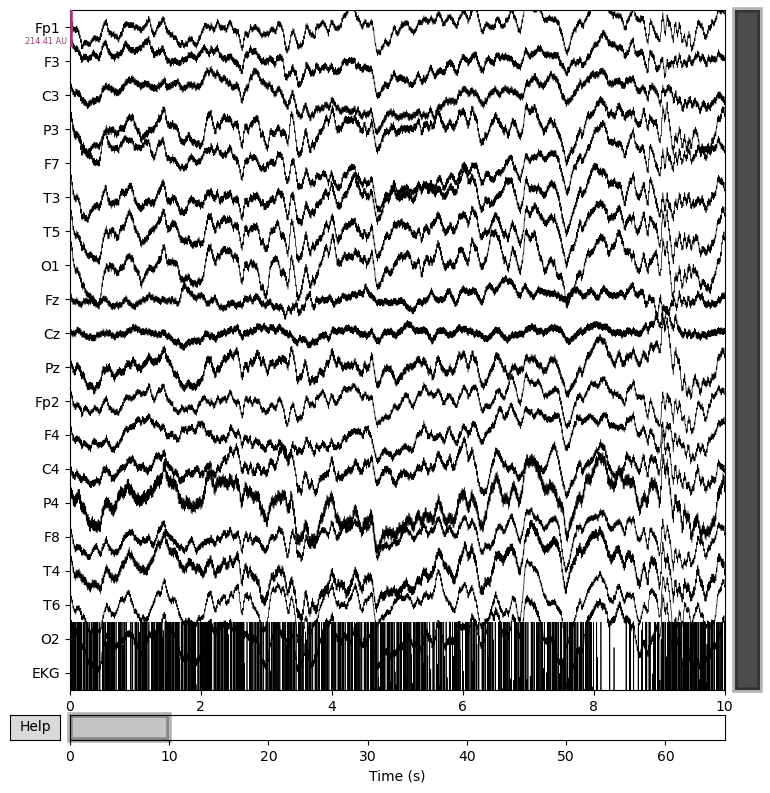

In [25]:
raw.plot()

Effective window size : 10.240 (s)


C:\Users\brandon\AppData\Local\Temp\ipykernel_38200\3813012011.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=100, picks=raw.info['ch_names']).plot(picks=raw.info['ch_names'], exclude="bads")
c:\Users\brandon\anaconda3\envs\kaggle_hms\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


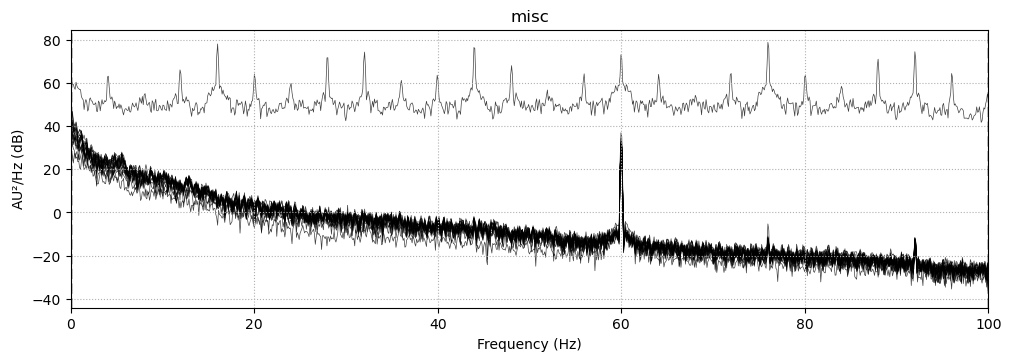

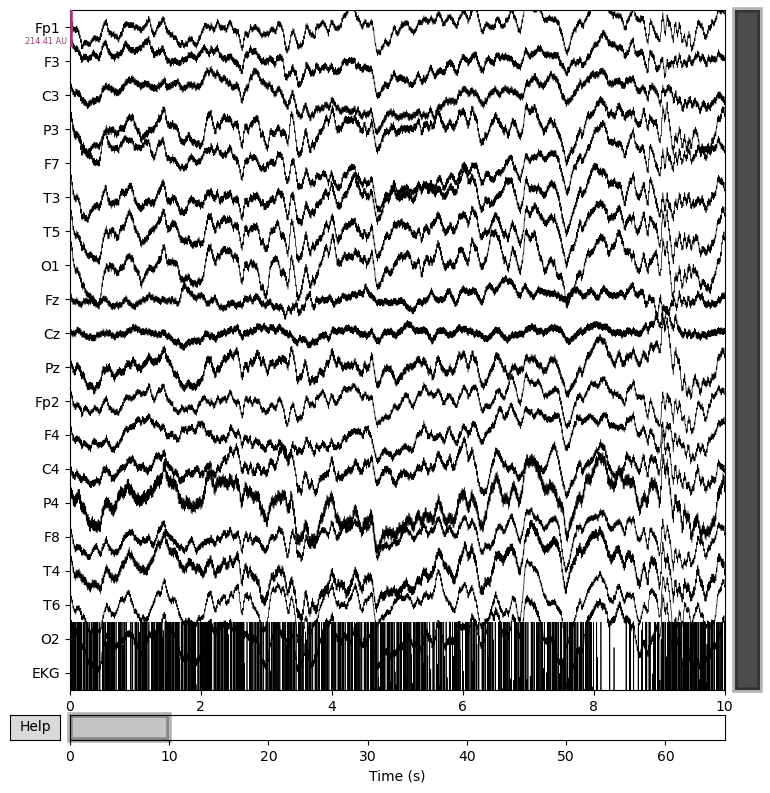

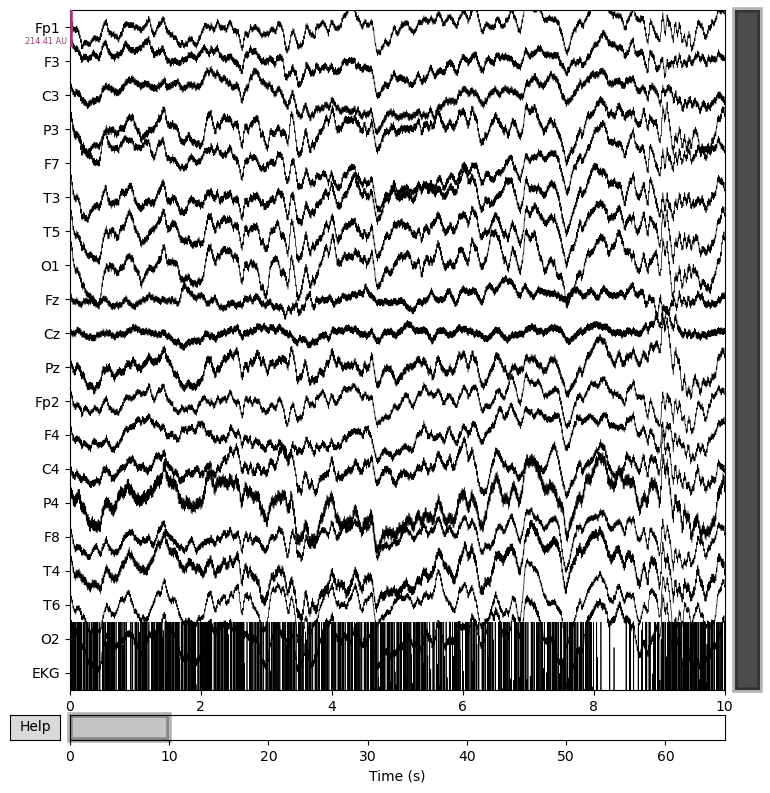

In [30]:
raw.compute_psd(fmax=100, picks=raw.info['ch_names']).plot(picks=raw.info['ch_names'], exclude="bads")
raw.plot(duration=10, n_channels=21, scalings='auto')


In [ ]:
df_votes = df[['eeg_id','lpd_vote', 'gpd_vote', 'lrda_vote','grda_vote','other_vote']]


In [31]:
import mne
df = pd.read_parquet(r'D:\__projects\DataSci\kaggle\hms-harmful-brain-activity-classification\data\train_spectrograms\353733.parquet')
csv = np.genfromtxt(r'D:\__projects\DataSci\kaggle\hms-harmful-brain-activity-classification\data\train_spectrograms\353733.csv', delimiter=",",usecols=range(0, 401))
ch_names = df.columns.tolist()
print(len(ch_names))
sfreq = 200 # not sure about the freq if you guys know the freq let me know, I will look into it more.
info = mne.create_info(ch_names=ch_names, sfreq=sfreq)
print(info)
raw = mne.io.RawArray(np.transpose(csv), info)

montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names, np.transpose(csv))))

401
<Info | 7 non-empty values
 bads: []
 ch_names: time, LL_0.59, LL_0.78, LL_0.98, LL_1.17, LL_1.37, LL_1.56, ...
 chs: 401 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 401
 projs: []
 sfreq: 200.0 Hz
>
Creating RawArray with float64 data, n_channels=401, n_times=321
    Range : 0 ... 320 =      0.000 ...     1.600 secs
Ready.


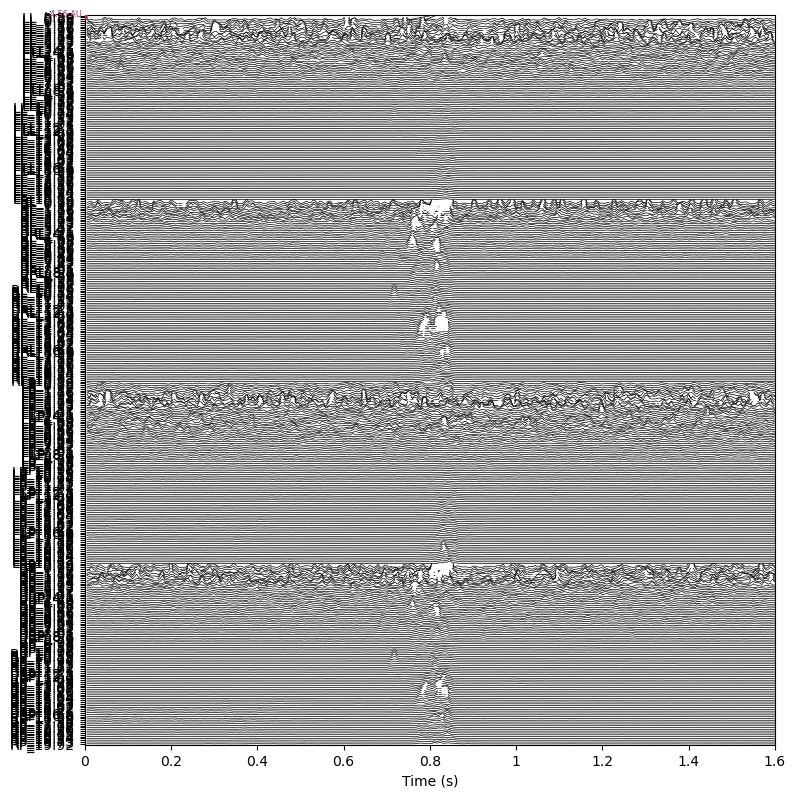

In [43]:
raw.plot(duration=10, n_channels=401, scalings='auto', show_scrollbars=False, show=False)